<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# DataFrame: 表格    Series: 一行/一列   (.apply 差異)
df = pd.DataFrame(boston["data"],
      columns=boston["feature_names"])
# df["ans"] = -1 全部欄位變-1
df["ans"] = boston["target"]
df.to_csv("boston.csv", encoding="utf-8", index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
df.drop(["ans"], axis=1) #原表格不會被破壞, 詳細可以查 DataFrame.Drop()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
# sklearn前:用pandas.DataFrame (split後會空行列之類的)
# sklearn後:用np.array
import numpy as np
from sklearn.model_selection import train_test_split
# x,y =df.drop(["ans"], axis=1), df["ans"] #上面的意思
x,y =np.array(df.drop(["ans"], axis=1)), np.array(df["ans"])

# 90%x, 10%x, 90%y, 10%y
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    test_size=0.1) # 如果加 random_state 會產生隨機固定結果
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
y_test

(455, 13)
(51, 13)
(455,)
(51,)


array([24.1, 29. , 13.4, 21. , 19.5, 15.7, 21.7, 23.1, 27.5, 10.5, 18.5,
       21.2, 21.4, 50. ,  9.6, 23.8, 20.3, 30.1, 16.8, 14.6, 18.7, 19.6,
       28.4, 22.2,  8.8, 27.5, 29.8, 24.4, 24.7, 23.1, 21.7, 20.9,  8.7,
       19.8, 23.7, 28. , 25. , 30.7, 23.4, 23.2, 12. , 23.1, 21.7, 23.6,
       20.4, 23.1, 22.2, 15.3, 36.2, 17.1, 25.3])

In [10]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(279.0, 475.65000000000003, 'RM <= 6.941\nmse = 88.404\nsamples = 455\nvalue = 22.588'),
 Text(139.5, 339.75, 'LSTAT <= 14.4\nmse = 39.306\nsamples = 381\nvalue = 19.723'),
 Text(69.75, 203.85000000000002, 'DIS <= 1.385\nmse = 24.958\nsamples = 220\nvalue = 23.292'),
 Text(34.875, 67.94999999999999, 'mse = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(104.625, 67.94999999999999, 'mse = 15.26\nsamples = 216\nvalue = 22.9'),
 Text(209.25, 203.85000000000002, 'CRIM <= 6.992\nmse = 17.716\nsamples = 161\nvalue = 14.845'),
 Text(174.375, 67.94999999999999, 'mse = 10.831\nsamples = 95\nvalue = 16.961'),
 Text(244.125, 67.94999999999999, 'mse = 11.908\nsamples = 66\nvalue = 11.8'),
 Text(418.5, 339.75, 'RM <= 7.437\nmse = 81.281\nsamples = 74\nvalue = 37.341'),
 Text(348.75, 203.85000000000002, 'LSTAT <= 12.55\nmse = 42.744\nsamples = 44\nvalue = 32.052'),
 Text(313.875, 67.94999999999999, 'mse = 20.722\nsamples = 41\nvalue = 33.344'),
 Text(383.625, 67.94999999999999, 'mse = 9.307\nsampl

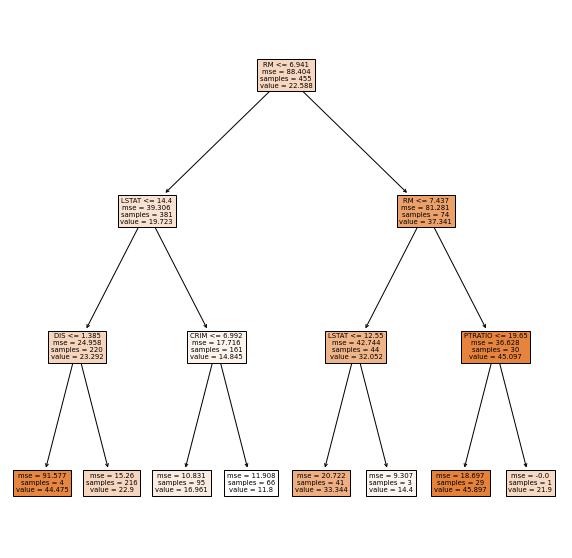

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(reg, feature_names=boston["feature_names"],
          filled=True)

In [6]:
from sklearn.metrics import accuracy_score
pre = reg.predict(x_test)
accuracy_score(pre, y_test)

1.0